Cross-Validation Scores: [0.11497326 0.1399287  0.13190731 0.11942959 0.13113292]
Mean Cross-Validation Score: 0.13
SVM Accuracy: 12.97%

Classification Report:
               precision    recall  f1-score   support

           1       0.16      0.20      0.18       123
           2       0.17      0.29      0.21       134
           3       0.13      0.14      0.13       111
           4       0.16      0.07      0.09       123
           5       0.19      0.04      0.06       112
           6       0.11      0.21      0.15       109
           7       0.10      0.04      0.06       116
           8       0.12      0.12      0.12       129
           9       0.15      0.16      0.15       127
          10       0.08      0.12      0.09       103
          11       0.12      0.12      0.12       121
          12       0.00      0.00      0.00        95

    accuracy                           0.13      1403
   macro avg       0.12      0.13      0.11      1403
weighted avg       0.13   

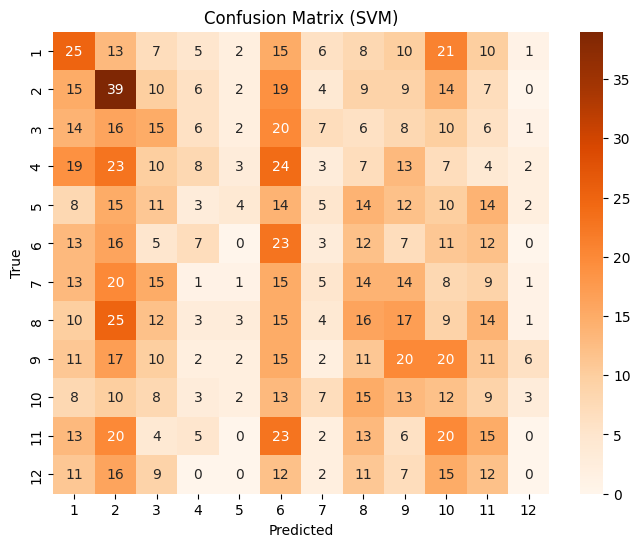

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('LDA.csv') 

# Step 2: Define features (X) and target labels (y)
X = data.drop('target', axis=1)  
y = data['target']  

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply LDA to reduce dimensionality
lda = LinearDiscriminantAnalysis(n_components=None)  # Classes - 1 components by default
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Step 5: Train SVM Classifier
svm = SVC(kernel='linear', random_state=42)  # You can try other kernels like 'rbf', 'poly'

# Step 6: Perform 5-fold cross-validation
cv_scores = cross_val_score(svm, X_train_lda, y_train, cv=5)  # 5-fold cross-validation

# Display cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")  # Display mean accuracy

# Step 7: Fit the model on the full training set
svm.fit(X_train_lda, y_train)

# Step 8: Predict on the test set
y_pred_svm = svm.predict(X_test_lda)

# Step 9: Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100  # Convert to percentage
print(f"SVM Accuracy: {accuracy_svm:.2f}%")  # Display accuracy

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


# Step 11: Create a summarized performance table
summary_data = {
    'Metric': ['Accuracy (%)', 'Cross-Validation Mean Score'],
    'Score': [accuracy_svm, cv_scores.mean()]
}

summary_df = pd.DataFrame(summary_data)

print("\nModel Performance Summary:")
print(summary_df)

# Step 10: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Oranges', 
            xticklabels=set(y), yticklabels=set(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVM)')
plt.show()


